# Convolutional Neural Network Project

## Project Context 
Differentiating a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment. 
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages
## Objective 
- To implement the techniques learnt in computer vision as part of the course. 






## Learning Outcomes:

**1. Pre-processing of image data.**

**2. Visualization of images.**

**3. Building CNN.**

**4. Evaluate the Model.** 

**## Steps and tasks:**

### 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.

### 2.Data Pre-processing:

  - Normalization.

  - Gaussian Blurring.

  - Visualize data after pre-processing.

### 3. Make data compatible: 

- Convert labelsto one-hot-vectors.

- Print the label for y_train[0].

- Split the dataset into training,testing, and validation set.

(Hint: First split images andlabels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
- Check  the  shape  of  data, Reshape  data  into  shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

### 4.Building CNN: 
- Define layers.
- Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

### 5. Fit and evaluate modeland print confusion matrix. 

### 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test [59]. 


## Alex N Waithera # Project #7 CNN

## 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.

In [65]:
## mounting the drive to be able to use the dataset stored in the dataset.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Import the libraries and load dataset 
import cv2
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

In [67]:
#Load and review labels data using pandas
Labels = pd.read_csv('/content/drive/My Drive/Labels.csv')
y = Labels
print(y)

                          Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]


In [68]:
#Load and review image data using numpy
X = np.load('/content/drive/My Drive/images.npy')

In [69]:
#Check image distribution for each label or class
y.value_counts()


Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

### Observation 
- There is a total of 12 classes in our target variable which the model will classify. 
- This will be a multi-class classification using the Convnet model. 
- No data imbalance of classes is captured. All the labels seem to be well distributed with loose silky-bent labels having the highest number and common wheat and maize having the lowest distribution. 

In [70]:
#Check the shape of the target variable or dependent variable. 
y.shape


(4750, 1)

###Observation 
- There are 4750 occurences of the y dependent variable which have the above distribution for each of the 12 classes available. 

In [71]:
# We Convert the labels to numpy array to feed into the supervised learning model.
y= y.values 

In [72]:
# Check the type of our independent variable which we will train using the Convnet model to predict our target variable. 
type(X) 

numpy.ndarray

In [73]:
#Checking the shape of the X variable tells us it is numpy array which is in 3D (dimensional)
# The images are 128X128 pixels and have three(3) channels RGB(Red, Green and Blue). 
X.shape

(4750, 128, 128, 3)

Text(0.5, 1.0, "['Small-flowered Cranesbill']")

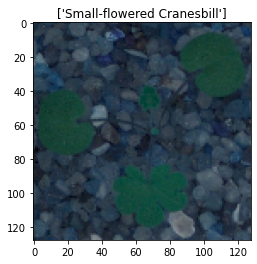

In [74]:
#We can vizualize the image at index one of the numpy array representing the images using the imshow function. 
i=1
img = X[i]
img = img.reshape((128,128, 3))
plt.imshow(img, cmap='gray')
plt.title(y[i])

## 2. Data Pre-processing
- Before developing and running our image data on the Convnet model, we will pre-process our 3-dimensional data through Gaussian blurring to reduce the noise in each image. 
- We will visualize to determine whether Gaussian blurring occurred using the same image (index 1) which is vizualized above. 
- After applying Gaussian blurring, we will split the dataset (both X and y) into three datasets: One for training the Convnet model, one for validation and one for testing the model to determine its accuracy and performance on unseen data. 
- We will also convert the label data(y) to one-hot-vectors so that it is compatible with the softmax multi-classification model. 
- We will then reshape and normalize the data so that it is compatible with the Convnet model as shown below. 

### a. Gaussian Blurring

In [75]:
X[0].shape 

(128, 128, 3)

In [76]:
# Apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(X):
  X[idx] = cv2.GaussianBlur(img, (5, 5), 0)

### b. Visualize data after pre-processing


Text(0.5, 1.0, "['Small-flowered Cranesbill']")

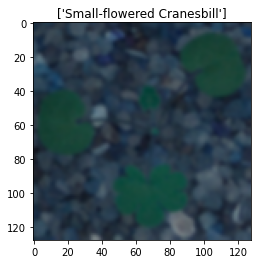

In [77]:
# Plot the de-noised image generated by applying Gaussian blur.
i=1
img = X[i]
plt.imshow(X[i], cmap='gray')
plt.title(y[i])

### Observation
- From the visualization above, the same image that had been visualized has blurred after applying Gaussian blurring. This tells us that our data has been pre- processed removing the extra noise that is not needed in our modeling. 
- As such, this dataset is ready for splitting into training and modeling to predict our target variable. 


### c. Split the dataset into training, testing, and validation set

In [78]:
# Split data into test and train to build the model. 
# We will split the dataset to have 70% of the data for training, 15% for validation and 15% for testing as captured below. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### d. Reshape input data and Normalization

In [79]:
# Reshape data into shapes compatible with Keras models
X_train = X_train.reshape((X_train.shape[0], 128, 128, 3)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 128, 128, 3)).astype('float32')
X_val = X_val.reshape((X_val.shape[0], 128, 128, 3)).astype('float32')

In [80]:
# Normalize inputs from 0-255 to 0-1
# Note: Pixel values are often integers in the range between 0 and 255. 
# As such, before modeling, we will standardize the pixel values to 0-1.  
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

### e. Convert labels to one-hot-vectors


In [81]:
#Convert all labels i.e. train, validation and test data to one-hot-vectors. 
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)
y_val = enc.fit_transform(y_val)

### f. Check the shape of data reshape data into shapes compatible with Covnet model. 


In [82]:
print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (3325, 12)
One value of y_train: [0 0 1 0 0 0 0 0 0 0 0 0]


In [83]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3325, 12)
(712, 12)
(713, 12)


In [84]:
# Print the shape of dataset.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_val.shape[0], 'validation samples')

X_train shape: (3325, 128, 128, 3)
3325 train samples
712 test samples
713 validation samples


## 4. Building the Convnet Model 
- The Convnet model was built using an initial convolutional layer with 32 feature maps of size 3x3, a pooling layer taking the max over 2X2 patches, another convolutional layer with 64 feature maps of size 3x3 and a final convolutional layer with 128 feature maps of size 3x3. 
- Extra droupout layers were added to reduce overfitting while a dense or fully connected layer with 512 neurons and relu activation. 
- Finally, since this is a multi-class classification involving 12 classes,  an additional dense layer with 12 neurons with a softmax activation was added at the last step of the model.
- The model was compliled using Adam optimizer and categorical crossentropy.
- Hyper-parameter tuning was conducted through change of number of epochs and the batch size to improve model accuracy. 
- An initial batch size of 200 was used, but this was changed to 50 and the model accuracy improved significantly. 
- Dropouts were applied at 25% and 30% to minimize overfitting of the model. Dropouts were added between convolutional layers as well as the dense output layers. 



### a. Define layers.


In [94]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
# define the larger model
def CNN_Model():
# create model
 model = Sequential()
 model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
 model.add(MaxPooling2D(2,2))
 model.add(Dropout(0.25))
 model.add(Conv2D(64, (3, 3), activation='relu'))
 model.add(MaxPooling2D(2,2))
 model.add(Dropout(0.25))
 model.add(Conv2D(128, (3, 3), activation='relu'))
 model.add(MaxPooling2D(2,2))
 model.add(Dropout(0.25))
 model.add(Flatten())
 model.add(Dropout(0.4))
 model.add(Dense(512, activation='relu'))
 model.add(Dropout(0.3))
 model.add(Dense(12, activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [95]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

### b. Fit Model 

In [96]:
# build the model
model = CNN_Model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=50)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN_Model Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/20
67/67 [==============================] - 105s 2s/step - loss: 2.4538 - accuracy: 0.1407 - val_loss: 1.7160 - val_accuracy: 0.4222
Epoch 2/20
67/67 [==============================] - 104s 2s/step - loss: 1.6687 - accuracy: 0.3940 - val_loss: 1.3468 - val_accuracy: 0.5540
Epoch 3/20
67/67 [==============================] - 105s 2s/step - loss: 1.3517 - accuracy: 0.5336 - val_loss: 1.0582 - val_accuracy: 0.6339
Epoch 4/20
67/67 [==============================] - 104s 2s/step - loss: 1.0762 - accuracy: 0.6227 - val_loss: 0.9586 - val_accuracy: 0.6971
Epoch 5/20
67/67 [==============================] - 104s 2s/step - loss: 0.9878 - accuracy: 0.6532 - val_loss: 0.9229 - val_accuracy: 0.6928
Epoch 6/20
67/67 [==============================] - 104s 2s/step - loss: 0.8633 - accuracy: 0.7130 - val_loss: 0.8584 - val_accuracy: 0.7097
Epoch 7/20
67/67 [==============================] - 104s 2s/step - loss: 0.7659 - accuracy: 0.7418 - val_loss: 0.7457 - val_accuracy: 0.7546
Epoch 8/20
67

## 5. Evaluate model and print confusion matrix

## Evaluating model performance using model accuracy metric and predicting image data for test data.

In [97]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN_Model Accuracy: %.2f%%" % (scores[1]*100))

CNN_Model Accuracy: 79.78%


In [98]:
# Convert the predicted images or output to one-hot vectors. 
Y_pred_class = np.argmax(model.predict(X_test), axis=-1)
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
Y_pred_class = enc.fit_transform(Y_pred_class)

Y_pred_class[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

### Confusion matrix 

In [100]:
num_classes = 12
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, Y_pred_class, target_names=target_names))



              precision    recall  f1-score   support

     Class 0       0.53      0.39      0.45        41
     Class 1       0.87      0.95      0.90        55
     Class 2       0.66      0.90      0.76        49
     Class 3       0.90      0.90      0.90        88
     Class 4       0.71      0.76      0.74        33
     Class 5       0.95      0.81      0.88        74
     Class 6       0.78      0.81      0.80       101
     Class 7       0.81      0.73      0.77        30
     Class 8       0.67      0.85      0.75        74
     Class 9       0.83      0.62      0.71        48
    Class 10       0.97      0.81      0.88        72
    Class 11       0.79      0.79      0.79        47

   micro avg       0.80      0.80      0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.81      0.80      0.80       712
 samples avg       0.80      0.80      0.80       712



## 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

Text(0.5, 1.0, '[1 0 0 0 0 0 0 0 0 0 0 0]')

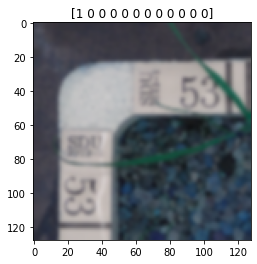

In [106]:
#Prediction for X_test[2]
i=2
img = X_test[i]
img = img.reshape((128, 128, 3))
plt.imshow(img, cmap='gray')
plt.title(Y_pred_class[i])

Text(0.5, 1.0, '[0 0 0 1 0 0 0 0 0 0 0 0]')

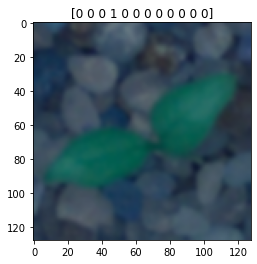

In [107]:
#Prediction for X_test[3]
i=3
img = X_test[i]
img = img.reshape((128, 128, 3))
plt.imshow(img, cmap='gray')
plt.title(Y_pred_class[i])

Text(0.5, 1.0, '[1 0 0 0 0 0 0 0 0 0 0 0]')

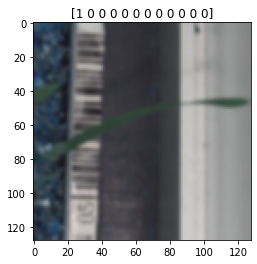

In [108]:
#Prediction for X_test[33]
i=33
img = X_test[i]
img = img.reshape((128, 128, 3))
plt.imshow(img, cmap='gray')
plt.title(Y_pred_class[i])

Text(0.5, 1.0, '[0 0 0 0 1 0 0 0 0 0 0 0]')

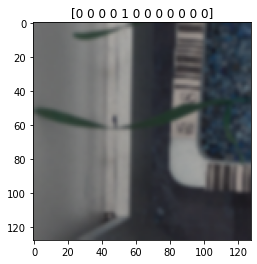

In [109]:
#Prediction for X_test[36]
i=36
img = X_test[i]
img = img.reshape((128, 128, 3))
plt.imshow(img, cmap='gray')
plt.title(Y_pred_class[i])

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0]')

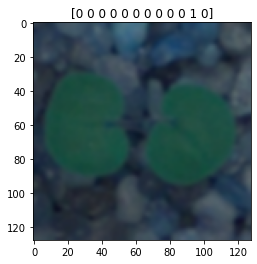

In [110]:
#Prediction for X_test[59]
i=59
img = X_test[i]
img = img.reshape((128, 128, 3))
plt.imshow(img, cmap='gray')
plt.title(Y_pred_class[i])

## Conclusion 

- The Convnet model was built using the concept and principles of convolutional neural networks as studied in the course. All the learning outcomes, including but not limited to pre-processing of image data, vizualization of images, building of the CNN model and evaluating the model as shown above. 
- The model built has a CNN error of 20% or a model accuracy of 79.78% on the test data. Five (5) Dropouts were applied in the CNN model to reduce overfitting as much as possible. 
- The confusion matrix presented shows that class zero has the least precision, recall and f1 score compared to the other classes. 
- On the other hand, class 11 scored well on all the parameters (precision, recall and f1 score) of atleast 85%. 
- Overall, we can conclude by saying this model is ready and can be used in production without overfitting or underfitting. Running epochs of 20 and a batch size of 50 seem to provide some of the best hyper-parameter tuning for this particular model. 
- Also, we are able to vizualize random predictions for test data and hence the model is ready for implementation to classify unique plants beloning to 12 species at several growth stages. 

